# Support Vector Machines

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv('train_insurance_one_hot.csv')
df_test = pd.read_csv('test_insurance_one_hot.csv')
df_train['expensive'] = df_train['charges'] > 25000
df_test['expensive'] = df_test['charges'] > 25000
df_train = df_train.drop(columns=['charges','chargeGroup'])
df_test = df_test.drop(columns=['charges','chargeGroup'])

In [3]:
x_train_1 = df_train[["age","bmi","smoker_yes"]]#,"smoker_no"
x_test_1 = df_test[["age","bmi","smoker_yes"]] #,"smoker_no"

x_train_2 = df_train.drop(columns=['id','expensive'], inplace=False)
x_test_2 = df_test.drop(columns=['id','expensive'], inplace=False)

y_train = df_train["expensive"]
y_test = df_test["expensive"]

## a) Initial SVM classifiers

In [4]:
import time
def accuracy_score(confusion_matrix):
    return (confusion_matrix[0][0]+confusion_matrix[1][1]) / confusion_matrix.sum().sum()
    
def train_svm_and_print_confusion_matrix(descriptive_features, descriptive_features_test, configs):
    start = time.time()
    svm_classifier = SVC(**configs)
    svm_classifier.fit(descriptive_features, y_train.values.ravel())
    predicted = svm_classifier.predict(descriptive_features_test)
    cfm = confusion_matrix(y_test, predicted)
    scores = precision_recall_fscore_support(y_test, predicted)
    print(cfm)
    print(f"Precision: {scores[0]}")
    print(f"Accuracy: {100*accuracy_score(cfm):.2f}%")
    print(f"Elapsed: {time.time()-start}s")
    #return svm_classifier


In [5]:
# Common config for models
common_config = {'C': 10, 'kernel':'linear', 'random_state':42}

### 1) Model 1 with Features: age, bmi, smoker

In [6]:
train_svm_and_print_confusion_matrix(x_train_1, x_test_1, common_config)

[[220   3]
 [  9  36]]
Precision: [0.96069869 0.92307692]
Accuracy: 95.52%
Elapsed: 0.2641632556915283s


### 2) Model 2 Features: all except id

In [7]:
train_svm_and_print_confusion_matrix(x_train_2, x_test_2, common_config)

[[220   3]
 [  9  36]]
Precision: [0.96069869 0.92307692]
Accuracy: 95.52%
Elapsed: 0.30436062812805176s


## b) Interpretation

In [8]:
# See report

## c)

In [9]:
# Initialize seperate StandardScaler
scaler1 = StandardScaler()
scaler1.fit(x_train_1)
scaler2 = StandardScaler()
scaler2.fit(x_train_2)
# Model trained on 3 feature
print(f"Model 3 feature:")
train_svm_and_print_confusion_matrix(scaler1.transform(x_train_1), scaler1.transform(x_test_1), common_config)
# Model trained on all features except id
print(f"\nModel all feature:")
train_svm_and_print_confusion_matrix(scaler2.transform(x_train_2), scaler2.transform(x_test_2), common_config)

Model 3 feature:
[[220   3]
 [  9  36]]
Precision: [0.96069869 0.92307692]
Accuracy: 95.52%
Elapsed: 0.022678375244140625s

Model all feature:
[[221   2]
 [  9  36]]
Precision: [0.96086957 0.94736842]
Accuracy: 95.90%
Elapsed: 0.028000354766845703s


## d)

C=0.01: Accuracy = 86.94%
Elapsed: 0.031522274017333984s
C=0.1: Accuracy = 95.15%
Elapsed: 0.02606964111328125s
C=1: Accuracy = 95.52%
Elapsed: 0.06484222412109375s
C=10: Accuracy = 95.52%
Elapsed: 0.35254454612731934s
C=100: Accuracy = 95.90%
Elapsed: 2.477570056915283s


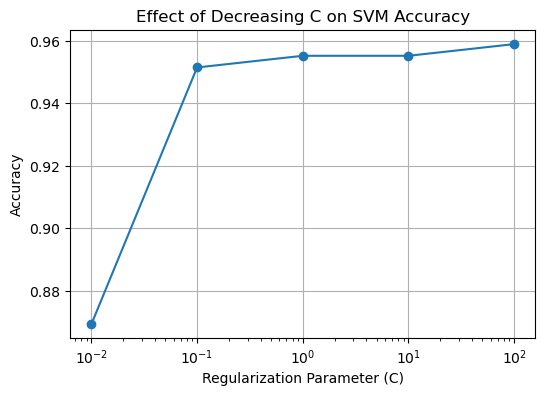

In [10]:
import matplotlib.pyplot as plt
import time
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

# Test different C values and calculate the accuracies
for C in C_values:
    start = time.time()
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(x_train_2, y_train) 
    y_pred = svm.predict(x_test_2)
    acc = accuracy_score(confusion_matrix(y_test, y_pred))
    accuracies.append(acc)
    print(f"C={C}: Accuracy = {100*acc:.2f}%")
    print(f"Elapsed: {time.time()-start}s")
# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Accuracy")
plt.title("Effect of Decreasing C on SVM Accuracy")
plt.grid(True)
plt.show()